In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Make Ellipsoid

In [92]:
def get_ellipsoid(theta, pos, a, b, debug=False):
    theta = np.radians(theta)
    v1 = [np.cos(theta), np.sin(theta)]
    v2 = [-np.sin(theta), np.cos(theta)]
    V = np.vstack([v1,v2]).T
    D = np.zeros((2,2))
    np.fill_diagonal(D,[a,b])
    P = np.matmul(np.matmul(V,D),V.T)
    if debug:
        plt.axis('equal')
        plt.arrow(0,0,v1[0],v1[1], color='k')
        plt.arrow(0,0,v2[0],v2[1], color='k')
    points = np.array([[j*np.cos(i), j*np.sin(i)] for i in np.arange(0,2*np.pi,0.01) for j in np.arange(0,01.1,0.01)])
    if debug:
        plt.plot(points[:,0], points[:,1], alpha=0.5)
        plt.arrow(pos[0],pos[1],a*v1[0],a*v1[1], color='k')
        plt.arrow(pos[0],pos[1],b*v2[0],b*v2[1], color='k')
    elipsoids = pos + np.matmul(points,P)
    if debug:
        plt.plot(elipsoids[:,0], elipsoids[:,1], 'r', alpha=0.5)
    return elipsoids

In [93]:
theta = [30, 120, -60, -150]
a = 4
b = 2
pos = np.array([[7,7],[-4,5],[5,-4],[-6,-5]])

for x,y in zip(*(theta,pos)):
    get_ellipsoid(x, y, a, b)

In [94]:
def get_graph(points,a,b,epigrpah=False,debug=False):
    x = points[:,0]
    y = points[:,1]
    if epigrpah:
        graph = points[y >= a * x + b]
    else:
        graph = points[y <= a * x + b]
    if debug:
        plt.plot(graph[:,0], graph[:,1], 'b', alpha=0.1)
    return graph

# Find Intersection

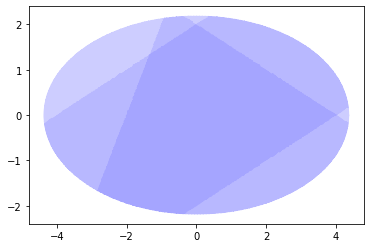

In [96]:
ellipsoid = get_ellipsoid(0,[0,0],4,2)
f1 = get_graph(ellipsoid, -0.5, 2, False,True)
f2 = get_graph(ellipsoid, 2, 4, False,True)
f3 = get_graph(ellipsoid, 0.5, 2, False,True)
f4 = get_graph(ellipsoid, 0.5, -2, True,True)

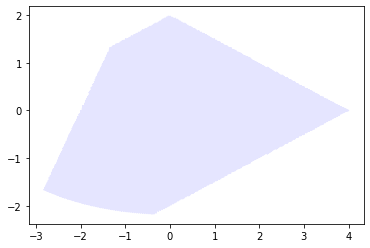

In [97]:
f1 = get_graph(ellipsoid, -0.5, 2, False,False)
f2 = get_graph(f1, 2, 4, False,False)
f3 = get_graph(f2, 0.5, 2, False,False)
f4 = get_graph(f3, 0.5, -2, True,True)